In [1]:
from aflow import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
result = search(batch_size=100
        ).filter(K.species == "O"
        ).filter(K.spacegroup_orig == 221
        ).filter(K.Pearson_symbol_orig == "cP5"
        ).filter(K.nspecies == 3
        ).select(
            K.compound, K.composition, K.species, K.natoms,
            K.spacegroup_orig, K.Pearson_symbol_orig,
            K.geometry, K.natoms, K.positions_fractional, K.positions_cartesian,
            K.enthalpy_atom, K.enthalpy_formation_atom
        )

In [ ]:
result = search(catalog="icsd", batch_size=100
        ).filter(K.spacegroup_orig == 221
        ).filter(K.Pearson_symbol_orig == "cP5"
        ).filter(K.nspecies == 3
        ).select(
            K.compound, K.composition, K.species, K.natoms,
            K.spacegroup_orig, K.Pearson_symbol_orig,
            K.geometry, K.natoms, K.positions_fractional, K.positions_cartesian,
            K.enthalpy_atom, K.enthalpy_formation_atom
        )

In [ ]:
result.max_N

In [ ]:
df = pd.DataFrame(columns=[
"auid", "aurl",
"compound", "composition", "species", "natoms",
"spacegroup", "pearson_symbol",
"geometry", "positions_fractional", "positions_cartesian",
"enthalpy_atom", "enthalpy_formation_atom"
])



counter = 1
for entry in result:
    print(f"{counter}. Found compound", entry.compound, "with auid", entry.auid)
    row = {
        "auid": entry.auid,
        "aurl": entry.aurl,
        
        "compound": entry.compound,
        "composition": entry.composition,
        "species": entry.species,
        "natoms": entry.natoms,
        
        "spacegroup": entry.spacegroup_orig,
        "pearson_symbol": entry.Pearson_symbol_orig,
        
        "geometry": entry.geometry,
        "positions_fractional": entry.positions_fractional,
        "positions_cartesian": entry.positions_cartesian,
        
        "enthalpy_atom": entry.enthalpy_atom,
        "enthalpy_formation_atom": entry.enthalpy_formation_atom
    }
    df = df.append(row, ignore_index=True)
    counter += 1

print("Done.")

In [ ]:
df.to_pickle("all_221_cp5_3_species_oxides.pkl")

In [2]:
df = pd.read_pickle("all_221_cp5_3_species_oxides.pkl")

In [46]:
df = pd.read_pickle("icsd_221_cp5_3_species.pkl")

In [47]:
df = df.drop_duplicates("compound")
df

,auid,aurl,compound,composition,species,natoms,spacegroup,pearson_symbol,geometry,positions_fractional,positions_cartesian,enthalpy_atom,enthalpy_formation_atom
0,aflow:c2bae074d76f81b6,aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/CUB/Ag1F3...,Ag1F3Zn1,"[1, 3, 1]","[Ag, F, Zn]",5,221,cP5,"[3.979183, 3.979183, 3.979183, 90.0, 90.0, 90.0]","[[0.0, 0.0, 0.0], [0.5, 0.5, 0.0], [0.0, 0.5, ...","[[0.0, 0.0, 0.0], [1.98959, 1.98959, -0.0], [0...",-3.35725,None
1,aflow:c568d79d0d0e9fc8,aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/CUB/Ag1Mn...,Ag1Mn3N1,"[1, 3, 1]","[Ag, Mn, N]",5,221,cP5,"[4.265445, 4.265445, 4.265445, 90.0, 90.0, 90.0]","[[0.0, 0.0, 0.0], [0.0, 0.5, 0.5], [0.5, 0.0, ...","[[0.0, 0.0, 0.0], [0.0, 2.13272, 2.13272], [2....",-5.99960,None
2,aflow:8944b3eb2c189cb7,aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/CUB/Ag1Nb...,Ag1Nb1O3,"[1, 1, 3]","[Ag, Nb, O]",5,221,cP5,"[4.000268, 4.000268, 4.000268, 90.0, 90.0, 90.0]","[[0.5, 0.5, 0.5], [0.0, 0.0, 0.0], [0.0, 0.0, ...","[[2.00013, 2.00013, 2.00013], [0.0, 0.0, 0.0],...",-6.76521,None
3,aflow:9da57f587b92d20f,aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/CUB/Ag3I1...,Ag3I1S1,"[3, 1, 1]","[Ag, I, S]",5,221,cP5,"[5.0311, 5.0311, 5.0311, 90.0, 90.0, 90.0]","[[0.5, 0.5, 0.0], [0.0, 0.5, 0.5], [0.5, 0.0, ...","[[2.51555, 2.51555, 0.0], [-0.0, 2.51555, 2.51...",-1.61106,None
4,aflow:d43abd3deaeccc51,aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/CUB/Al1Bi...,Al1Bi1O3,"[1, 1, 3]","[Al, Bi, O]",5,221,cP5,"[3.793297, 3.793297, 3.793297, 90.0, 90.0, 90.0]","[[0.5, 0.5, 0.5], [0.0, 0.0, 0.0], [0.0, 0.5, ...","[[1.89665, 1.89665, 1.89665], [0.0, 0.0, 0.0],...",-6.54116,-2.28122
...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,aflow:f2a5b2edf497bb0b,aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/CUB/O3Sn1...,O3Sn1Ti1,"[3, 1, 1]","[O, Sn, Ti]",5,221,cP5,"[3.980776, 3.980776, 3.980776, 90.0, 90.0, 90.0]","[[0.5, 0.5, 0.0], [0.0, 0.5, 0.5], [0.5, 0.0, ...","[[1.99039, 1.99039, -0.0], [0.0, 1.99039, 1.99...",-6.92630,None
723,aflow:493eb6e26780d785,aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/CUB/O3Sr1...,O3Sr1Tc1,"[3, 1, 1]","[O, Sr, Tc]",5,221,cP5,"[4.045254, 4.045254, 4.045254, 90.0, 90.0, 90.0]","[[0.5, 0.0, 0.0], [0.0, 0.5, 0.0], [0.0, 0.0, ...","[[2.02263, 0.0, 0.0], [0.0, 2.02263, 0.0], [-0...",-6.91254,None
725,aflow:37c7f43d3abe11ce,aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/CUB/O3Sr1...,O3Sr1Ti1,"[3, 1, 1]","[O, Sr, Ti]",5,221,cP5,"[3.97291, 3.97291, 3.97291, 90.0, 90.0, 90.0]","[[0.0, 0.5, 0.5], [0.5, 0.0, 0.5], [0.5, 0.5, ...","[[0.0, 1.98645, 1.98645], [1.98645, 0.0, 1.986...",-7.47382,None
751,aflow:6381b955a3963bf3,aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/CUB/O3Sr1...,O3Sr1V1,"[3, 1, 1]","[O, Sr, V]",5,221,cP5,"[3.897829, 3.897829, 3.897829, 90.0, 90.0, 90.0]","[[0.5, 0.0, 0.0], [0.0, 0.5, 0.0], [0.0, 0.0, ...","[[1.94891, 0.0, -0.0], [-0.0, 1.94891, 0.0], [...",-7.35920,None


In [48]:
np.unique(df.compound).shape

(377,)

In [49]:
oxides = df[df.compound.str.contains('O')]

In [50]:
np.unique(oxides.compound).shape

(93,)

In [51]:
elements = np.unique(np.hstack(np.array(df.species)))
print(elements)
print(elements.shape)

['Ag' 'Al' 'As' 'Au' 'B' 'Ba' 'Be' 'Bi' 'Br' 'C' 'Ca' 'Cd' 'Ce' 'Cl' 'Co'
 'Cr' 'Cs' 'Cu' 'Dy' 'Er' 'Eu' 'F' 'Fe' 'Ga' 'Gd' 'Ge' 'H' 'Hf' 'Hg' 'Ho'
 'I' 'In' 'Ir' 'K' 'La' 'Li' 'Lu' 'Mg' 'Mn' 'Mo' 'N' 'Na' 'Nb' 'Nd' 'Ni'
 'O' 'P' 'Pa' 'Pb' 'Pd' 'Pr' 'Pt' 'Pu' 'Rb' 'Rh' 'Ru' 'S' 'Sb' 'Sc' 'Si'
 'Sn' 'Sr' 'Ta' 'Tb' 'Tc' 'Th' 'Ti' 'Tl' 'Tm' 'U' 'V' 'W' 'Y' 'Yb' 'Zn'
 'Zr']
(76,)


In [52]:
elements = np.unique(np.hstack(np.array(oxides.species)))
print(elements)
print(elements.shape)

['Ag' 'Al' 'Au' 'Ba' 'Bi' 'Br' 'Ca' 'Cd' 'Ce' 'Cl' 'Co' 'Cr' 'Cs' 'Eu'
 'Fe' 'Ga' 'Ge' 'Hf' 'I' 'In' 'Ir' 'K' 'La' 'Li' 'Mn' 'Mo' 'Na' 'Nb' 'Nd'
 'O' 'Pa' 'Pb' 'Pr' 'Pu' 'Rb' 'Rh' 'Ru' 'Sc' 'Si' 'Sn' 'Sr' 'Ta' 'Tb' 'Tc'
 'Th' 'Ti' 'U' 'V' 'W' 'Yb' 'Zr']
(51,)


In [53]:
df.enthalpy_formation_atom.isna().sum() / df.shape[0] * 100

93.89920424403184

In [54]:
oxides.enthalpy_formation_atom.isna().sum() / oxides.shape[0] * 100

80.64516129032258

In [55]:
df.enthalpy_atom.isna().sum() / df.shape[0] * 100

0.0

In [56]:
oxides.enthalpy_atom.isna().sum() / oxides.shape[0] * 100

0.0

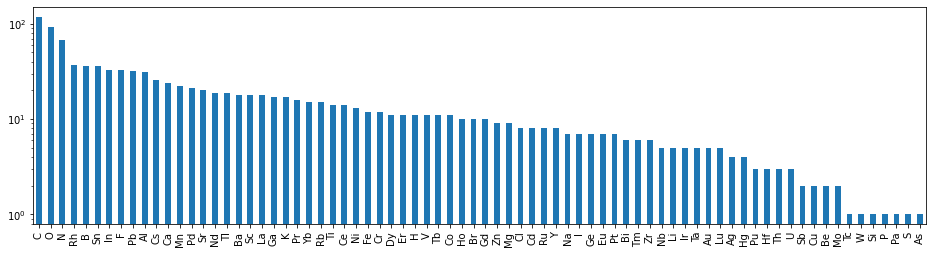

In [57]:
pd.Series(np.hstack(np.array(df.species))).value_counts().plot.bar(figsize=(16,4))
plt.yscale("log")

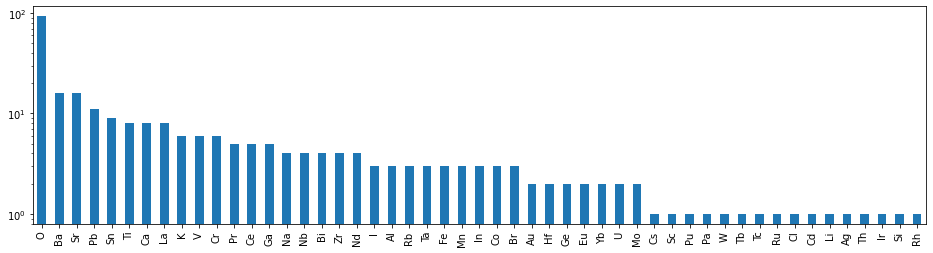

In [60]:
pd.Series(np.hstack(np.array(oxides.species))).value_counts().plot.bar(figsize=(16,4))
plt.yscale("log")

In [33]:
variances = df.groupby("compound").enthalpy_atom.var()

In [34]:
variances[variances.isna()] = 0 # only 1 entry

In [36]:
variances.mean()

0.5177030304261709

(array([1.175e+03, 3.100e+02, 1.450e+02, 1.070e+02, 7.600e+01, 5.100e+01,
        3.500e+01, 2.300e+01, 1.800e+01, 1.300e+01, 7.000e+00, 6.000e+00,
        3.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        3.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00]),
 array([0.        , 0.32312921, 0.64625843, 0.96938764, 1.29251685,
        1.61564606, 1.93877528, 2.26190449, 2.5850337 , 2.90816292,
        3.23129213, 3.55442134, 3.87755055, 4.20067977, 4.52380898,
        4.84693819, 5.1700674 , 5.49319662, 5.81632583, 6.13945504,
        6.46258426, 6.78571347, 7.10884268, 7.43197189, 7.75510111,
        8.07823032]),
 <a list of 25 Patch objects>)

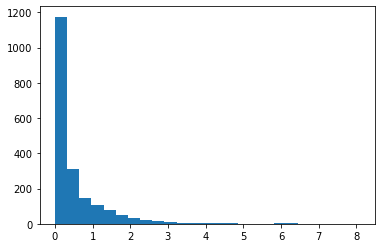

In [37]:
plt.hist(variances, bins=25)

In [ ]:
from voxel import *

In [ ]:
# https://en.wikipedia.org/wiki/Fractional_coordinates#In_crystallography
def calc_basis(geometry):
    a = geometry[0]
    b = geometry[1]
    c = geometry[2]
    alpha = geometry[3] / 180 * np.pi
    beta = geometry[4] / 180 * np.pi
    gamma = geometry[5] / 180 * np.pi
    
    cosa = np.cos(alpha)
    cosb = np.cos(beta)
    cosg = np.cos(gamma)
    sing = np.sin(gamma)
    
    omega = a*b*c*np.sqrt(1 - cosa*cosa - cosb*cosb - cosg*cosg + 2*cosa*cosb*cosg)
    
    A = np.array([
        [ a, b * cosg,                      c * cosb],
        [0., b * sing, c * (cosa - cosb*cosg) / sing],
        [0.,       0.,        omega / (a * b * sing)]
    ])
    
    A = np.round(A, decimals=14)
    
    return A


def calc_cartesian_positions(A, positions_fractional):
    positions_cartesian = np.apply_along_axis(
        lambda p: A.dot(p), 1, positions_fractional
    )
    return positions_cartesian

In [ ]:
# C,D,H,W
def make_descriptor(mol, sigma, L, N, elements=None):
    if elements is None:
        elements = mol.species # for testing
    elements = np.array(elements)
        
    descriptor = np.zeros((len(elements), N, N, N))
    
    A = calc_basis(mol.geometry)
    coords = calc_cartesian_positions(A, mol.positions_fractional)
    
    
    mx, my, mz = get_mesh_coords(A, L, N)
        
    # atom coordinations are order accoring to composition and species
    cs = np.cumsum(mol.composition)
    cs = np.insert(cs, 0, 0) # insert 0 at beginning
    
    print(elements)
        
    for i, element in enumerate(mol.species):
        print(element)
        element_coords = coords[cs[i]:cs[i+1]]
        print(cs[i], cs[i+1])
        print(element_coords, element_coords.shape)
        B, G, SG = reciprocal_lattice_gaussian(A, element_coords, sigma, mx, my, mz)
        element_descriptor = adapt_to_voxel_grid(G, SG, L, N) # (N,N,N)
        
        j = np.where(elements == element)[0][0]
        descriptor[j,:,:,:] = element_descriptor
    
    return descriptor
        

In [ ]:
mol = oxides.loc[0]
mol

In [ ]:
elements = np.unique(np.hstack(np.array(oxides.species)))
elements

In [ ]:
d = make_descriptor(mol, sigma=0.1, L=12.8, N=32, elements=elements)
d.shape

In [ ]:
np.prod(d.shape)

In [ ]:
np.sum(d.nonzero()) / np.prod(d.shape) * 100

In [ ]:
import ase
%matplotlib widget
import nglview

def elements_coords(entry, augment=True):
    elements = []
    for e, n in zip(entry.species, entry.composition):
        elements = elements + [e]*n
        
        
    pfs_list = list(entry.positions_fractional)
    
    if augment:
        for element, coords in zip(elements, pfs_list):
            for i, c in enumerate(coords):
                if c == 0:
                    new_coords = coords.copy()
                    new_coords[i] = 1.

                    already_in = False
                    for other_p in pfs_list:
                        if all(other_p == new_coords):
                            already_in = True
                            break

                    if not already_in:
                        pfs_list.append(new_coords)
                        elements.append(element)
    
    pfs = np.array(pfs_list)
    
    A = calc_basis(entry.geometry)
    cartesian_coords = calc_cartesian_positions(A, pfs)
    
    return elements, cartesian_coords

def show_molecule(mol, augment=False):
    A = calc_basis(mol.geometry)
    elements, coords = elements_coords(mol, augment=augment)
    ase_mol = ase.Atoms(symbols=elements, positions=coords, pbc=True, cell=A)
    view = nglview.show_ase(ase_mol)
    view.background="black"
    display(view)

In [ ]:
def get_element_list(mol):
    elements = []
    for e, n in zip(mol.species, mol.composition):
        elements = elements + [e]*n
    return elements

In [ ]:
def show_molecule(mol, calc_coords=True):
    A = calc_basis(mol.geometry)
    if calc_coords:
        coords = calc_cartesian_positions(A, mol.positions_fractional)
    else:
        coords = mol.positions_cartesian
        
    elements = get_element_list(mol)
    ase_mol = ase.Atoms(symbols=elements, positions=coords, pbc=False, cell=A)
    view = nglview.show_ase(ase_mol)
    view.background="black"
    display(view)

In [ ]:
show_molecule(mol, calc_coords=False)

In [ ]:
ase_mol = ase.Atoms(
    positions=np.array([
        [0., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 1.],
        [1., 0., 1.],
        [1., 1., 0.],
        [1., 1., 1.]
    ]),
    pbc=True, cell=np.eye(3)*2)

view = nglview.show_ase(ase_mol)
view.background="black"
display(view)

In [ ]:
o_sr_ti = pd.read_pickle("OSrTi.pkl")

In [ ]:
r = o_sr_ti.loc[2]
r.compound

In [ ]:
show_molecule(r, augment=False)

In [ ]:
ase_mol = ase.Atoms(
    positions=r.positions_cartesian,
    pbc=False)

view = nglview.show_ase(ase_mol)
view.background="black"
display(view)

In [ ]:
A = calc_basis(r.geometry)

fig = pålt.figure()
ax = Axes3D(fig)

colors = ["red", "green", "blue", "orange", "purple", "black"]


elements, coords = elements_coords(r, augment=True)
    
    

color_dict = {}
for i, element in enumerate(r.species):
    color_dict[element] = colors[i]


print(color_dict)

cs = []
for element in elements:
    cs.append(color_dict[element])


corners = np.array([
        [0., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 1.],
        [1., 0., 1.],
        [1., 1., 0.],
        [1., 1., 1.]
    ])
import itertools
for corner1, corner2 in itertools.product(corners, repeat=2):
    if np.sum(np.abs(corner1 - corner2)) == 1:
        cc = list(zip(A.dot(corner1), A.dot(corner2)))
        ax.plot(cc[0], cc[1], cc[2], color="black")

ax.scatter(coords[:,0], coords[:,1], coords[:,2], alpha=1, c=cs, s=25)
for i in range(3):
    ax.plot([0, A[0,i]], [0,A[1,i]], [0,A[2,i]])
    
legend_handels = []
for i, n in enumerate(r.composition):
    legend_element = plt.Line2D([0], [0], marker='o', color="w",
                                markerfacecolor= colors[i], label=r.species[i], markersize=10)
    legend_handels.append(legend_element)

plt.suptitle(r.compound)
ax.legend(handles=legend_handels)
plt.show()

In [ ]:
r